# Comparing model predictions and ground truth labels with Rubrix and Hugging Face

## Build dataset

You skip this step if you run:


In [ ]:
from datasets import load_dataset
import rubrix as rb

ds = rb.DatasetForTextClassification.from_datasets(load_dataset("rubrix/sst2_with_predictions", split="train"))

Otherwise, the following cell will run the pipeline over the training set and store labels and predictions.

In [ ]:
from datasets import load_dataset
from transformers import pipeline, AutoModelForSequenceClassification

import rubrix as rb

name = "distilbert-base-uncased-finetuned-sst-2-english"

# Need to define id2label because surprisingly the pipeline has uppercase label names 
model = AutoModelForSequenceClassification.from_pretrained(name, id2label={0: 'negative', 1: 'positive'})
nlp = pipeline("sentiment-analysis", model=model, tokenizer=name, return_all_scores=True)

dataset = load_dataset("glue", "sst2", split="train")

# batch predict
def predict(example):
    return {"prediction": nlp(example["sentence"])}

# add predictions to the dataset
dataset = dataset.map(predict, batched=True).rename_column("sentence", "text")

# build rubrix dataset from hf dataset
ds = rb.DatasetForTextClassification.from_datasets(dataset, annotation="label")

In [ ]:
# Install Rubrix and start exploring and sharing URLs with interesting subsets, etc.
rb.log(ds, "sst2")

In [90]:
ds.to_datasets().push_to_hub("rubrix/sst2_with_predictions")

Pushing dataset shards to the dataset hub:   0%|          | 0/1 [00:00<?, ?it/s]

## Analize misspredictions and ambiguous labels

### With the UI

With Rubrix UI you can:

- Combine filters and full-text/DSL queries to quickly find important samples
- All URLs contain the state so you can share with collaborator and annotator specific dataset regions to work on.
- Sort examples by score, as well as custom metadata fields.



![example.png](example.png)


### Programmatically

Let's find all wrong predictions from Python. This useful for bulk operations (relabelling, discarding, etc.)

In [85]:
import pandas as pd

# Get dataset slice with wrong predictions
df = rb.load("sst2", query="predicted:ko").to_pandas()

# display first 20 examples
with pd.option_context('display.max_colwidth', None):
    display(df[["text", "prediction", "annotation"]].head(20))

text  \
0                                                                               this particular , anciently demanding métier    
1                                                                                                             under our skin    
2                evokes a palpable sense of disconnection , made all the more poignant by the incessant use of cell phones .    
3     plays like a living-room war of the worlds , gaining most of its unsettling force from the suggested and the unknown .    
4                                            into a pulpy concept that , in many other hands would be completely forgettable    
5                                                                                                  transcends ethnic lines .    
6                                                                                                                  is barely    
7                                                 a pulpy concept that , in many other hands would be completely forgettable    
8                                                                                         of hollywood heart-string plucking    
9                                                                                          a minimalist beauty and the beast    
10                                                    the intimate , unguarded moments of folks who live in unusual homes --    
11                                                                                                           steals the show    
12                                                                                                                    enough    
13                                                                                                     accept it as life and    
14  this is the kind of movie that you only need to watch for about thirty seconds before you say to yourself , ` ah , yes ,    
15                                            plunges you into a reality that is , more often then not , difficult and sad ,    
16             overcomes the script 's flaws and envelops the audience in his character 's anguish , anger and frustration .    
17                                                                                      troubled and determined homicide cop    
18                                  human nature is a goofball movie , in the way that malkovich was , but it tries too hard    
19                                                                                           to watch too many barney videos    

                                                             prediction  \
0     [(negative, 0.9386059045791626), (positive, 0.06139408051967621)]   
1     [(positive, 0.7508484721183777), (negative, 0.24915160238742828)]   
2      [(negative, 0.6634528636932373), (positive, 0.3365470767021179)]   
3    [(positive, 0.9968075752258301), (negative, 0.003192420583218336)]   
4      [(positive, 0.6178210377693176), (negative, 0.3821789622306824)]   
5    [(positive, 0.9758220314979553), (negative, 0.024177948012948036)]   
6     [(negative, 0.9922297596931458), (positive, 0.00777028314769268)]   
7    [(negative, 0.9738760590553284), (positive, 0.026123959571123123)]   
8    [(positive, 0.9889695644378662), (negative, 0.011030420660972595)]   
9     [(positive, 0.9100378751754761), (negative, 0.08996208757162094)]   
10  [(positive, 0.9967381358146667), (negative, 0.0032618637196719646)]   
11     [(negative, 0.8031412363052368), (positive, 0.1968587338924408)]   
12     [(positive, 0.7941301465034485), (negative, 0.2058698982000351)]   
13  [(positive, 0.9987508058547974), (negative, 0.0012492131209000945)]   
14    [(negative, 0.7889454960823059), (positive, 0.21105451881885529)]   
15     [(positive, 0.967541515827179), (negative, 0.03245845437049866)]   
16   [(positive, 0.9953157901763916), (negative, 0.004684178624302149)]   
17    [(negative, 0.6632784008979797), (positive, 0.336721599

<AxesSubplot:>

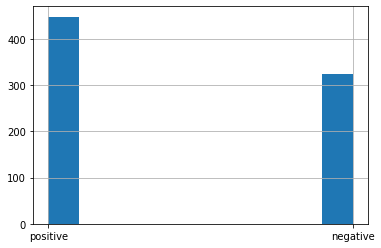

In [86]:
df.annotation.hist()

In [88]:
# Get dataset slice with wrong predictions
df = rb.load("sst2", query="predicted:ko and annotated_as:negative").to_pandas()

# display first 20 examples
with pd.option_context('display.max_colwidth', None):
    display(df[["text", "prediction", "annotation"]].head(20))

text  \
0                                                       plays like a living-room war of the worlds , gaining most of its unsettling force from the suggested and the unknown .    
1                                                                                                                                            a minimalist beauty and the beast    
2                                                                                                                                                        accept it as life and    
3                                                                                               plunges you into a reality that is , more often then not , difficult and sad ,    
4                                                                overcomes the script 's flaws and envelops the audience in his character 's anguish , anger and frustration .    
5                                                                                                                                                        and social commentary    
6                                                  we do n't get williams ' usual tear and a smile , just sneers and bile , and the spectacle is nothing short of refreshing .    
7                                                                                      before pulling the plug on the conspirators and averting an american-russian armageddon    
8                                                                                                                                                  in tight pants and big tits    
9                                                                                         that it certainly does n't feel like a film that strays past the two and a half mark    
10                                                                                                                                                 actress-producer and writer    
11                                                                        gives devastating testimony to both people 's capacity for evil and their heroic capacity for good .    
12                                       deep into the girls ' confusion and pain as they struggle tragically to comprehend the chasm of knowledge that 's opened between them    
13                                                                    a younger lad in zen and the art of getting laid in this prickly indie comedy of manners and misanthropy    
14                                                                                                                                           get on a board and , uh , shred ,    
15                                                                                                                                                         so preachy-keen and    
16                                                                 there 's an admirable rigor to jimmy 's relentless anger , and to the script 's refusal of a happy ending ,    
17  ` christian bale 's quinn ( is ) a leather clad grunge-pirate with a hairdo like gandalf in a wind-tunnel and a simply astounding cor-blimey-luv-a-duck cockney accent . '    
18                                                                                                                                                    passion , grief and fear    
19                                                                                to keep the extremes of screwball farce and blood-curdling family intensity on one continuum    

                                                             prediction  \
0    [(positive, 0.9968075752258301), (negative, 0.003192420583218336)]   
1     [(positive, 0.9100378751754761), (negative, 0.08996208757162094)]   
2   [(positive, 0.9987508058547974), (negative, 0.0012492131209000945)]   
3      [(positive, 0.967541515827179), (negative, 0.03245845437049866)]   
4    [(positive, 0.9953157901763916)

In [82]:
# Get dataset slice with wrong predictions
df = rb.load("sst2", query="predicted:ko and score:{0.99 TO *}").to_pandas()

# display first 20 examples
with pd.option_context('display.max_colwidth', None):
    display(df[["text", "prediction", "annotation"]].head(20))

text  \
0                                                                      plays like a living-room war of the worlds , gaining most of its unsettling force from the suggested and the unknown .    
1                                                                                                                                                                       accept it as life and    
2                                                                               overcomes the script 's flaws and envelops the audience in his character 's anguish , anger and frustration .    
3                                                            will no doubt rally to its cause , trotting out threadbare standbys like ` masterpiece ' and ` triumph ' and all that malarkey ,    
4                                                                 we do n't get williams ' usual tear and a smile , just sneers and bile , and the spectacle is nothing short of refreshing .    
5                                                                                                     somehow manages to bring together kevin pollak , former wrestler chyna and dolly parton    
6                                                                                 there 's an admirable rigor to jimmy 's relentless anger , and to the script 's refusal of a happy ending ,    
7             the bottom line with nemesis is the same as it has been with all the films in the series : fans will undoubtedly enjoy it , and the uncommitted need n't waste their time on it    
8                                                                                                                                                   is genial but never inspired , and little    
9                                                            heaped upon a project of such vast proportions need to reap more rewards than spiffy bluescreen technique and stylish weaponry .    
10                                           than recommended -- as visually bland as a dentist 's waiting room , complete with soothing muzak and a cushion of predictable narrative rhythms    
11                                                                                                                                                                              spectacle and    
12                                                                                                                                                                                  groan and    
13                                                              're not likely to have seen before , but beneath the exotic surface ( and exotic dancing ) it 's surprisingly old-fashioned .    
14                                                                                                                                 its metaphors are opaque enough to avoid didacticism , and    
15           by kevin bray , whose crisp framing , edgy camera work , and wholesale ineptitude with acting , tone and pace very obviously mark him as a video helmer making his feature debut    
16                                                                            evokes the frustration , the awkwardness and the euphoria of growing up , without relying on the usual tropes .    
17                                                                                                                                                           , incoherence and sub-sophomoric    
18                                                                   seems intimidated by both her subject matter and the period trappings of this debut venture into the heritage business .    
19  despite downplaying her good looks , carries a little too much ai n't - she-cute baggage into her lead role as a troubled and determined homicide cop to quite pull off the heavy stuff .    

                                                             prediction  \
0    [(positive, 0.9968075752258301)

In [83]:
# Get dataset slice with wrong predictions
df = rb.load("sst2", query="predicted:ko and score:{* TO 0.6}").to_pandas()

# display first 20 examples
with pd.option_context('display.max_colwidth', None):
    display(df[["text", "prediction", "annotation"]].head(20))

text  \
0                                                                                      get on a board and , uh , shred ,    
1                                                                       is , truly and thankfully , a one-of-a-kind work    
2                                                                      starts as a tart little lemon drop of a movie and    
3                                                                                        between flaccid satire and what    
4                                        it certainly does n't feel like a film that strays past the two and a half mark    
5                                                   who liked there 's something about mary and both american pie movies    
6                          many good ideas as bad is the cold comfort that chin 's film serves up with style and empathy    
7                                                                                                    about its ideas and    
8                                                                                               of a sick and evil woman    
9                                                  though this rude and crude film does deliver a few gut-busting laughs    
10           to squeeze the action and our emotions into the all-too-familiar dramatic arc of the holocaust escape story    
11  that throws a bunch of hot-button items in the viewer 's face and asks to be seen as hip , winking social commentary    
12                                                                                                's soulful and unslick    

                                                           prediction  \
0   [(positive, 0.5352609753608704), (negative, 0.46473899483680725)]   
1   [(positive, 0.5819814801216125), (negative, 0.41801854968070984)]   
2    [(negative, 0.5641832947731018), (positive, 0.4358167052268982)]   
3   [(negative, 0.5532692074775696), (positive, 0.44673076272010803)]   
4   [(negative, 0.5386656522750854), (positive, 0.46133431792259216)]   
5    [(negative, 0.5086333751678467), (positive, 0.4913666248321533)]   
6    [(positive, 0.557632327079773), (negative, 0.44236767292022705)]   
7    [(positive, 0.518638551235199), (negative, 0.48136141896247864)]   
8    [(negative, 0.5554516315460205), (positive, 0.4445483684539795)]   
9    [(positive, 0.5045541524887085), (negative, 0.4954459071159363)]   
10  [(negative, 0.5050069093704224), (positive, 0.49499306082725525)]   
11  [(negative, 0.5873904228210449), (positive, 0.41260960698127747)]   
12  [(positive, 0.5931627750396729), (negative, 0.40683719515800476)]   

   annotation  
0    negative  
1    negative  
2    positive  
3    positive  
4    positive  
5    positive  
6    negative  
7    negative  
8    positive  
9    negative  
10   positive  
11   positive  
12   negative

In [105]:
from rubrix.metrics.commons import *

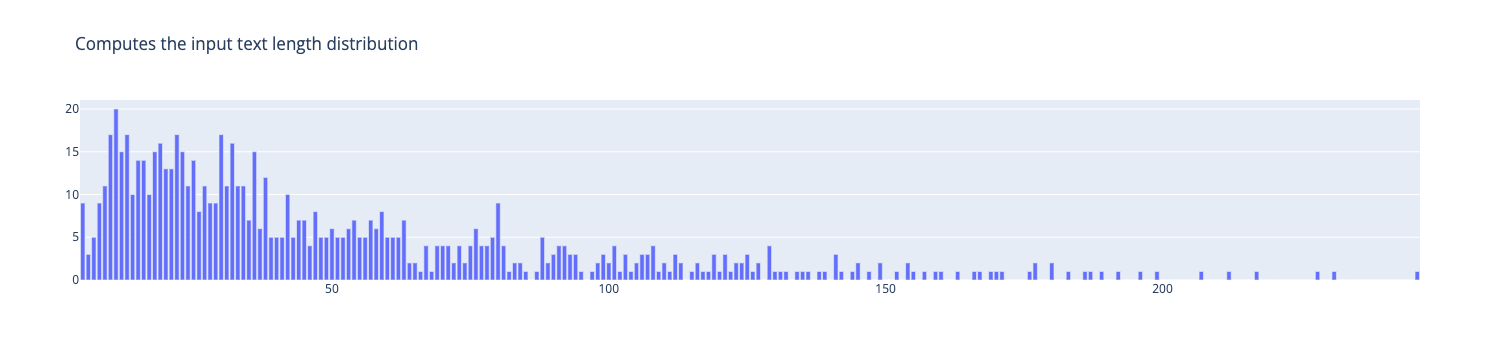

In [103]:
text_length("sst2", query="predicted:ko").visualize()

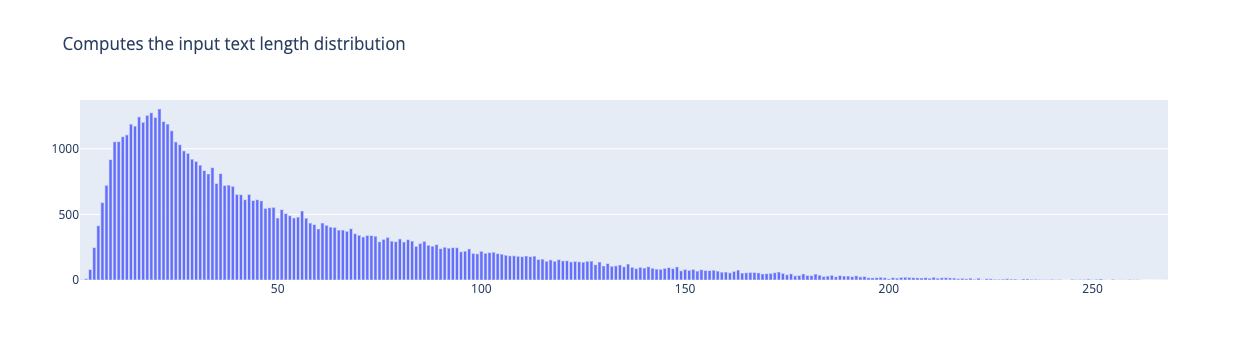

In [104]:
text_length("sst2", query="predicted:ok").visualize()

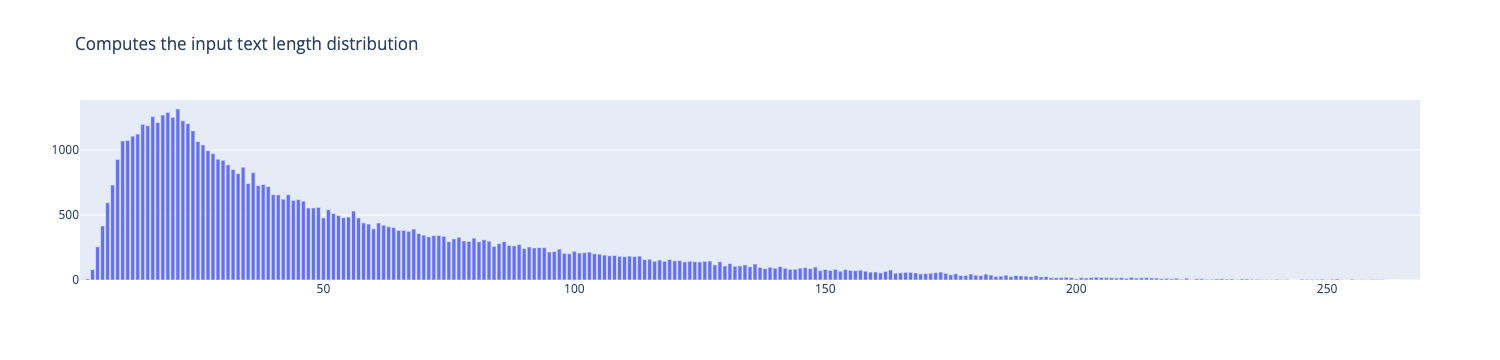

In [108]:
text_length("sst2").visualize()

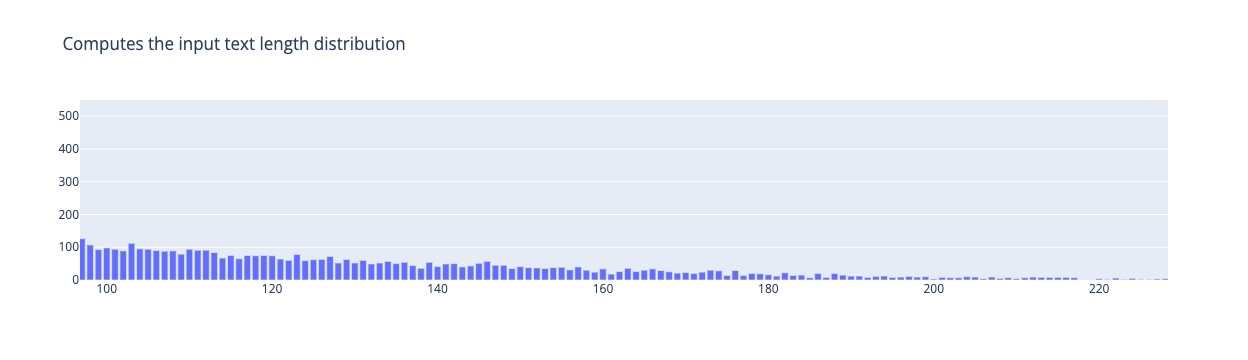

In [109]:
text_length("sst2", query="predicted_as:negative").visualize()

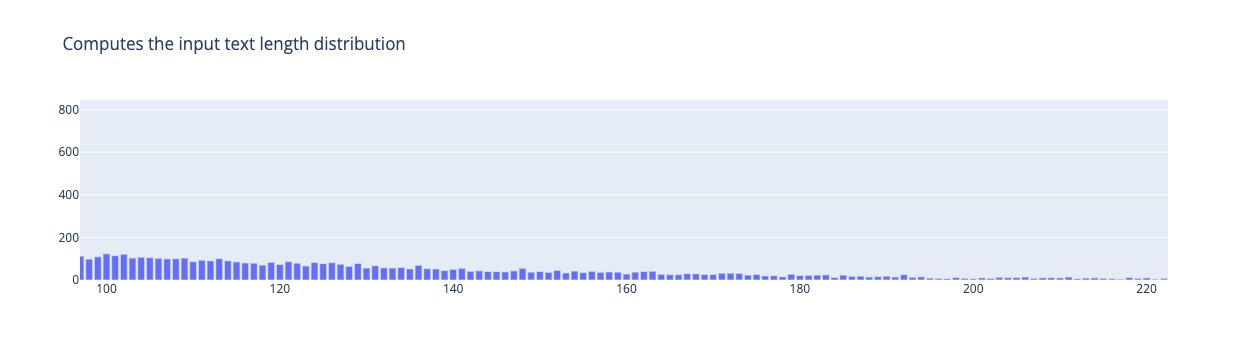

In [110]:
text_length("sst2", query="predicted_as:positive").visualize()